In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


# 3.다변량 분포
> 하나의 스칼라에 대한 정규분포를 알아봤습니다. 이번장은 벡터의 정규분포, 즉 다변량 정규분포를 알아봅니다.


# 3.1 넘파이와 다차원 배열 
> 이 책에는 벡터와 행렬이 자주 등장합니다. 이번장에서는 넘파이를 사용해 벡터와 행렬을 다루는 방법을 알아봅니다.


### 3.1.1 다차원배열
> 다차원 배열은 값(원소) 여러개를 한번에 처리하기 위한 데이터 구조입니다. 원소의 배열에는 방향이 있고 이 방향을 축 (Axis)이라하고  축의 갯수를 차원(dimension)이라고 합니다.
$$
% 스칼라
\mathbf{스칼라} =
1 
$$
$$
% 벡터
\mathbf{벡터} = \begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}
$$
$$
% 행렬
행렬 = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}
$$



위에서부터 0차원 배열, 1차원 배열, 2차원 배열입니다.


% 벡터를 표현하는 두가지 방법
$$
\mathbf{열 벡터} = \begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}
$$
$$
\mathbf{행 벡터} = \begin{pmatrix}
1 & 2 & 3
\end{pmatrix}
$$

### 3.1.2 넘파이 배열 생성
> 넘파이로 벡터와 행렬만들기

In [3]:
import numpy as np

# 벡터 만들기
a = np.array([1,2,3])
print("a의 정보")
print(a.__class__)
print(a.shape)
print(a.ndim)
print("-----------")

# 행렬 만들기
b = np.array([[1,2,3],[4,5,6]])
print("b의 정보")
print(b.__class__)
print(b.shape)
print(b.ndim)
print("-----------")



a의 정보
<class 'numpy.ndarray'>
(3,)
1
-----------
b의 정보
<class 'numpy.ndarray'>
(2, 3)
2
-----------


### 3.1.3 원소별 연산
> 형상이 같은 두 다차원 배열에 대해 원소별 연산을 할 수 있습니다. 원소별 곱을 야다마르 곱이라고 합니다.


In [5]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[1,2,3],[3,4,5]])
print(W+X)
print("-----------")
print(W*X)

[[ 2  4  6]
 [ 7  9 11]]
-----------
[[ 1  4  9]
 [12 20 30]]


### 3.1.4 백터의내적과 행렬곱
> 다음과 같이 원소수가 D인 벡터 x,y가 있습니다.
$$
\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_D
\end{pmatrix}
$$
$$
\mathbf{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_D
\end{pmatrix}
$$

이 때 내적은 다음과 같이 정의됩니다.
$$
\mathbf{x} \cdot \mathbf{y} = x_1 y_1 + x_2 y_2 + \cdots + x_D y_D
$$

행렬곱 계산방법
행렬 A와 B의 곱 C = AB는 다음과 같이 계산됩니다:

A가 m × n 행렬이고 B가 n × p 행렬일 때,
$$
C_{ij} = \sum_{k=1}^n a_{ik}b_{kj}
$$

예를 들어 2×3 행렬 A와 3×2 행렬 B의 곱은 다음과 같습니다:
$$
A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32}
\end{pmatrix}
$$

$$
AB = \begin{pmatrix}
a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31} & a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} \\
a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} & a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32}
\end{pmatrix}
$$





In [6]:
#백터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a,b))
print("-----------")


32
-----------


In [7]:
# 행렬곱
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print(np.dot(A,B))
print("-----------")




[[22 28]
 [49 64]]
-----------


In [8]:
print(A@B)
print("-----------")

[[22 28]
 [49 64]]
-----------


## 3.2 다변량정규분포
> 키의 분포만 살펴봤다면(스칼라), 키와 몸무게인 벡터를 살펴봅시다.

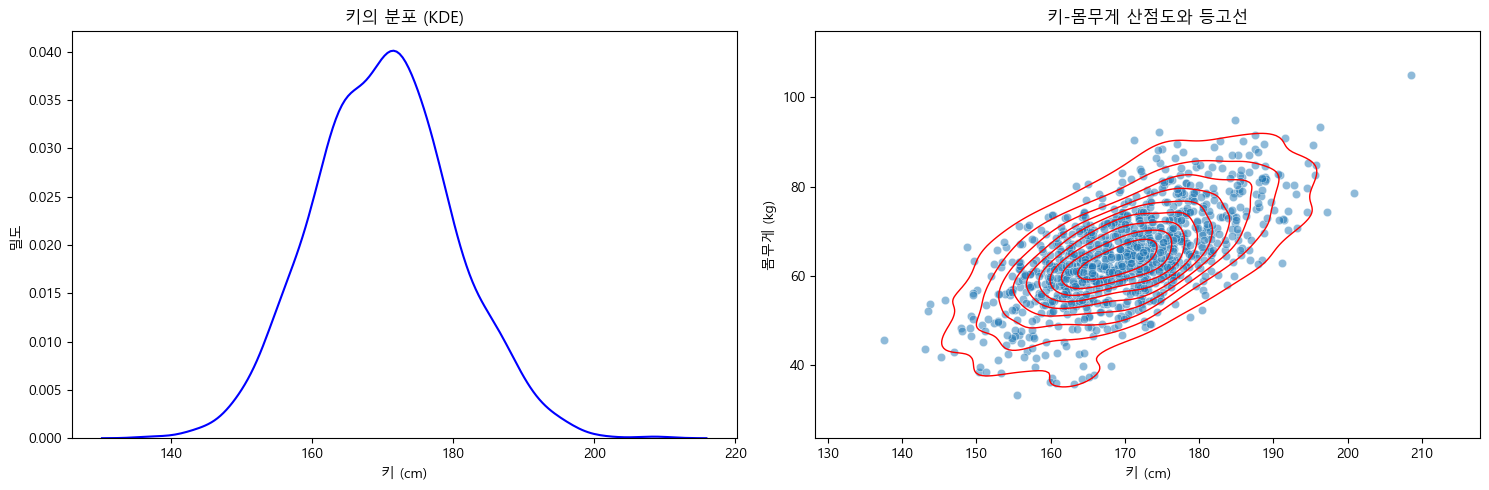

In [4]:
# 1차원 정규분포 (kde)와 2차원 정규분포 (corr plot) 비교하기
# 랜덤 샘플 데이터 생성
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n_samples = 1000

# 키 데이터 생성 (평균 170cm, 표준편차 10)
height = np.random.normal(170, 10, n_samples)

# 키와 상관관계가 있는 몸무게 데이터 생성 (평균 65kg, 표준편차 12)
weight = 0.7 * height - 55 + np.random.normal(0, 8, n_samples)

# 시각화를 위한 subplot 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. 키의 1차원 정규분포 (KDE)
sns.kdeplot(data=height, ax=ax1, color='blue')
ax1.set_title('키의 분포 (KDE)')
ax1.set_xlabel('키 (cm)')
ax1.set_ylabel('밀도')

# 2. 키-몸무게의 2차원 산점도와 등고선
sns.scatterplot(x=height, y=weight, alpha=0.5, ax=ax2)
sns.kdeplot(x=height, y=weight, levels=10, color='red', linewidths=1, ax=ax2)
ax2.set_title('키-몸무게 산점도와 등고선')
ax2.set_xlabel('키 (cm)')
ax2.set_ylabel('몸무게 (kg)')

plt.tight_layout()


3.2.1 다변량정규분포의 정의
x는 D개의 확률 변수를 모아놓은 벡터라고 합니다.
$$
\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_D
\end{pmatrix}
$$

또한 x는 분포가 같은 D개의 독립적인 샘플이 아닙니다. x에 대한 정규분포는 다음식으로 표현됩니다.
$$
p(\mathbf{x}) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right)
$$

- p(x)는 벡터 x에 대한 확률밀도값
- D는 차원 수
- μ (mu)는 평균 벡터
- Σ (Sigma)는 공분산 행렬
- |Σ|는 공분산 행렬의 행렬식
- $\Sigma^{-1}$ : 공분산의 역행렬
- (x-μ)는 평균과의 차이를 나타내는 벡터
- 지수 부분은 마할라노비스 거리의 제곱을 나타냄




### 3.2.2 다변량정규분포의 구현

## 3.3 2차원 정규 분포 시각화

### 3.3.1 3D 그래프 시각화





### 3.3.2 등고선 그리기

### 3.3.2 2차원 정규분포 그래프

## 3.4 다변량 정규분포의 최대가능도 추정

### 3.4.1 최대가능도 추정의 정의




### 3.4.2 최대가능도 추정의 구현


### 3.4.3 실제데이터 사용